### Exploratory data analysis (EDA)

1. Use the Haberman Cancer Survival dataset given in the current directory
2. Perform alanlaysis dataset with the following sections: 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful for classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.

### Haberman Cancer Survival dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

haberman = pd.read_csv("haberman.csv")

In [2]:
print (haberman.shape)

(306, 4)


In [3]:
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [24]:
# Class Distribution
haberman["status"].value_counts()

status
1    225
2     81
Name: count, dtype: int64

## Univariate Analysis

### 1-D Scatter Plot

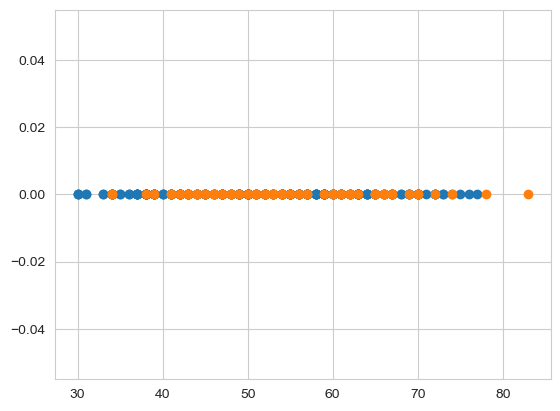

In [8]:
haberman_alive = haberman.loc[haberman["status"] == 1]
haberman_dead = haberman.loc[haberman["status"] == 2]

plt.plot(haberman_alive["age"], np.zeros_like(haberman_alive["age"]), 'o')
plt.plot(haberman_dead["age"], np.zeros_like(haberman_dead["age"]), 'o')
plt.show()


### Histograms and PDFs

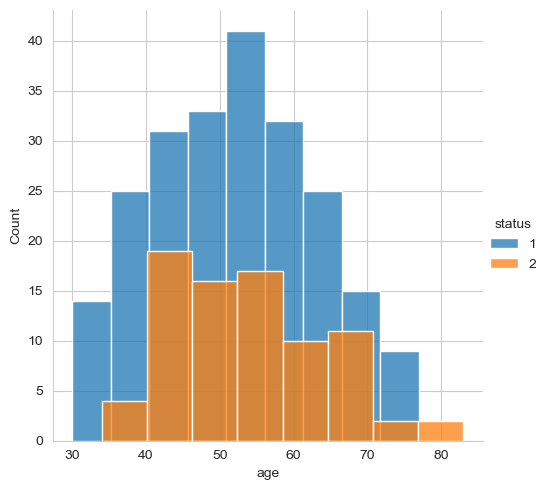

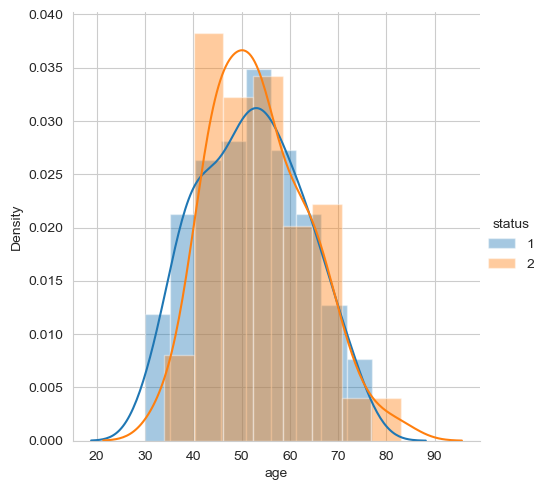

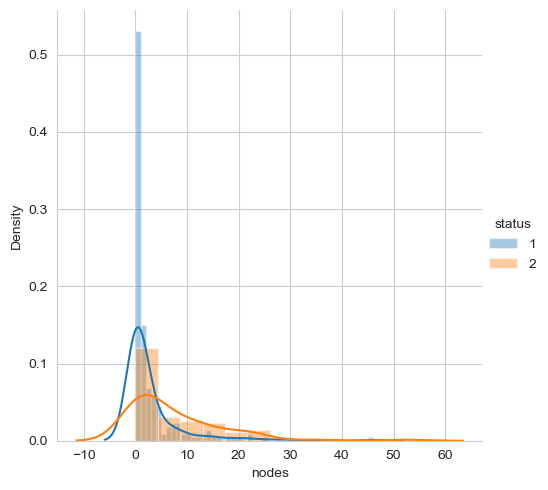

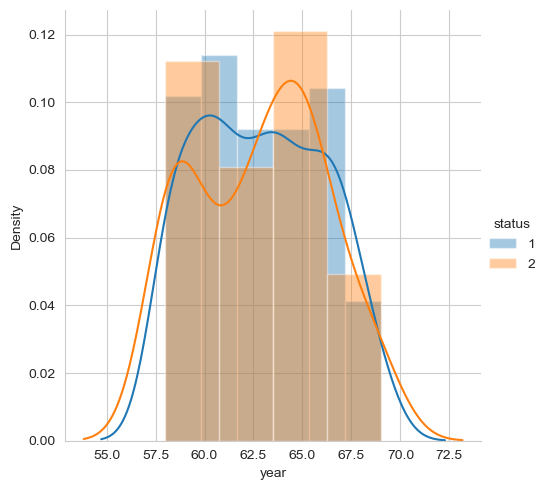

In [9]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.histplot, "age") \
   .add_legend()
plt.show()

sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend()
plt.show()

sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.show()

sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.show()

### CDF and PDF

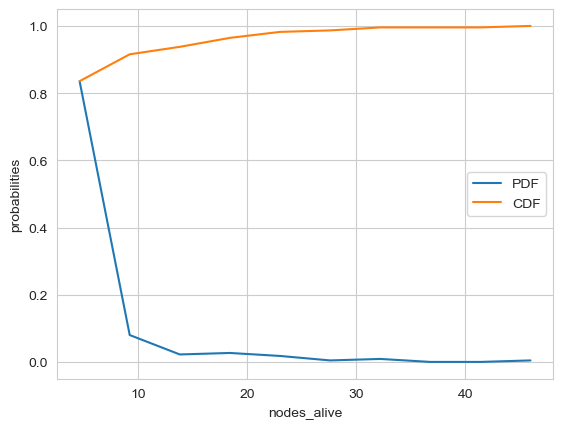

In [11]:
# for haberman_alive

counts, bin_edges = np.histogram(haberman_alive['nodes'], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="PDF")
plt.plot(bin_edges[1:], cdf, label="CDF")
plt.xlabel('nodes_alive')
plt.ylabel('probabilities')
plt.legend()
plt.show()

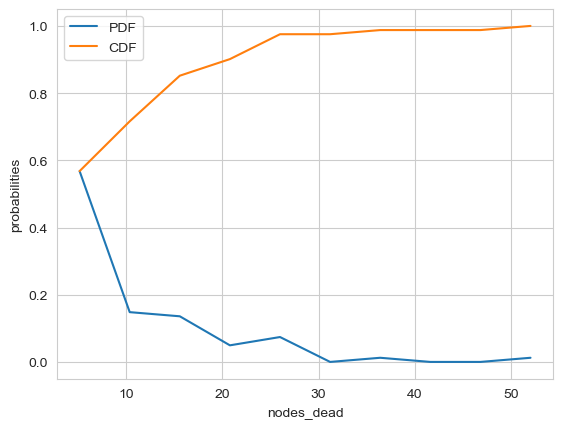

In [12]:
# for haberman_dead

counts, bin_edges = np.histogram(haberman_dead['nodes'], bins=10, density=True)
pdf = counts / sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label="PDF")
plt.plot(bin_edges[1:], cdf, label="CDF")
plt.xlabel('nodes_dead')
plt.ylabel('probabilities')
plt.legend()
plt.show()

## Descriptive Statistics

### Mean, Variance, and Std-dev

In [21]:
print("Means:")
print("Alive:", np.mean(haberman_alive["age"]))
print("Dead:", np.mean(haberman_dead["age"]))

print("\nVariances:")
print("Alive:", np.var(haberman_alive["age"]))
print("Dead:", np.var(haberman_dead["age"]))

print("\nStandard Deviations:")
print("Alive:", np.std(haberman_alive["age"]))
print("Dead:", np.std(haberman_dead["age"]))

Means:
Alive: 52.01777777777778
Dead: 53.67901234567901

Variances:
Alive: 120.72857283950623
Dead: 102.09449778997102

Standard Deviations:
Alive: 10.98765547510051
Dead: 10.10418219303131


### Median, Percentile, Quantile, IQR, MAD

In [14]:
print("\nMedians:")
print(np.median(haberman_alive["age"]))
print(np.median(haberman_dead["age"]))

print("\nQuantiles:")
print(np.percentile(haberman_alive["age"], np.arange(0, 100, 25)))
print(np.percentile(haberman_dead["age"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_alive["age"], 90))
print(np.percentile(haberman_dead["age"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_alive["age"]))
print(robust.mad(haberman_dead["age"]))


Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


## Box Plot and Violin Plot

### Box Plot

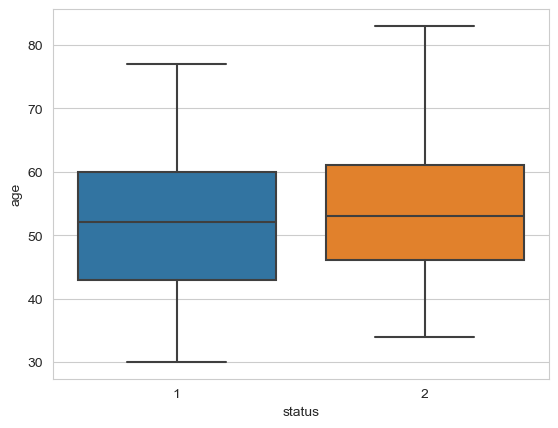

In [15]:
sns.boxplot(x='status', y='age', data=haberman)
plt.show()

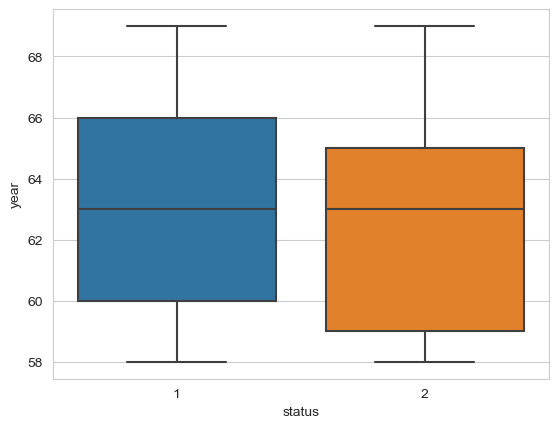

In [25]:
sns.boxplot(x='status', y='year', data=haberman)
plt.show()

### Violin Plot

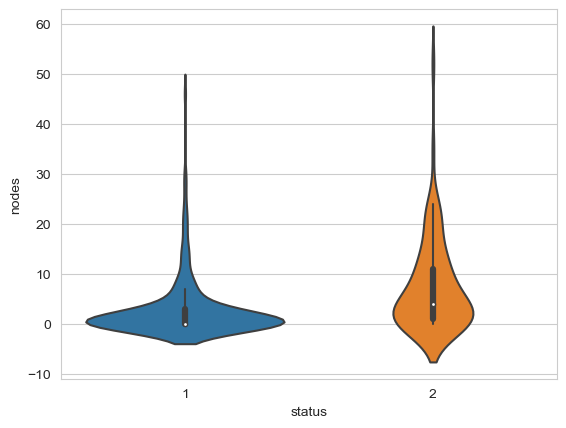

In [26]:
sns.violinplot(x='status', y='nodes', data=haberman, size=8)
plt.show()

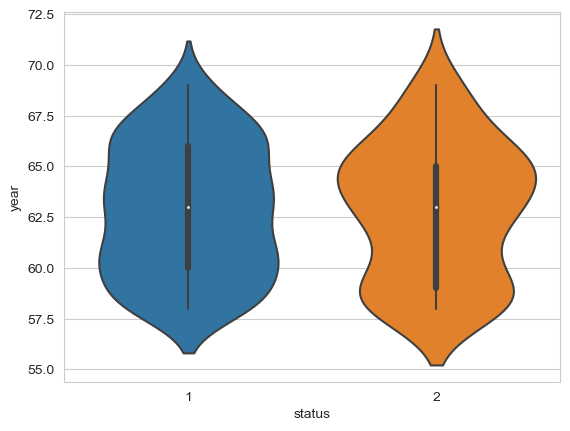

In [27]:
sns.violinplot(x='status', y='year', data=haberman, size=8)
plt.show()

## Bivariate Analysis

### 2-D Scatter Plot

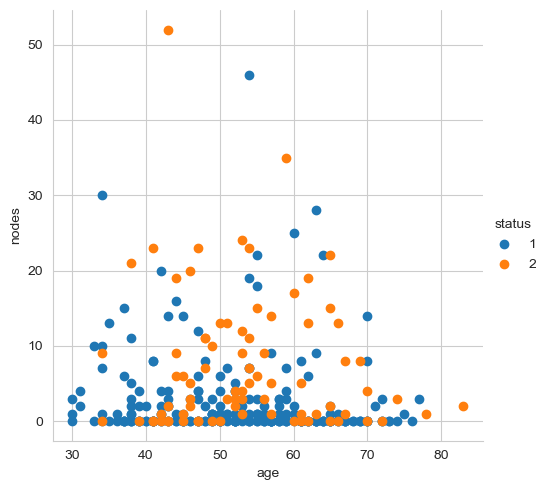

In [22]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend()
plt.show()

### Pair Plot

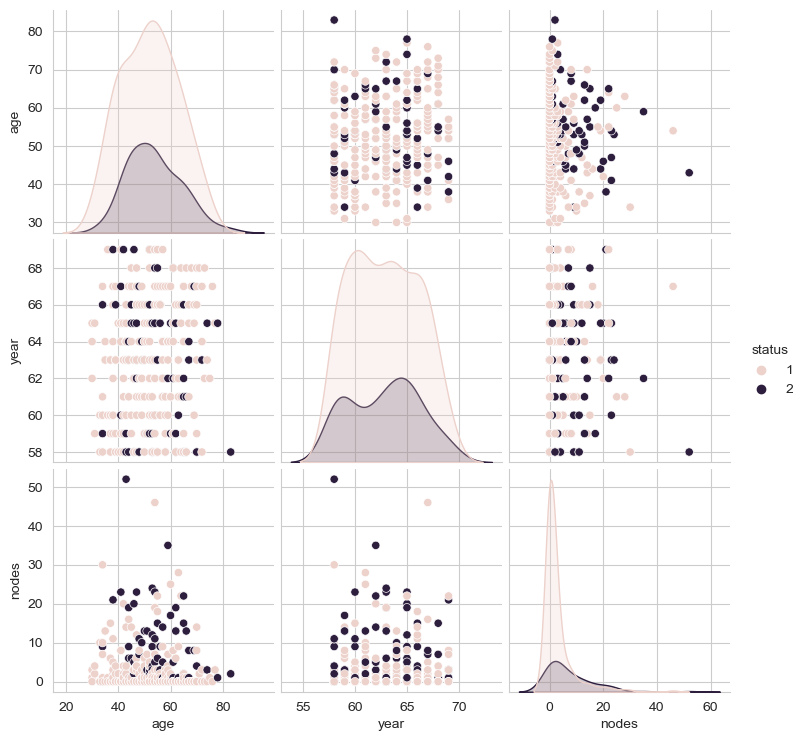

In [23]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="status")
plt.show()